In [4]:
#import all the needed libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix,roc_auc_score

In [5]:
df=pd.read_csv('messages.csv')
df

subject  \
0               job posting - apple-iss research center   
1                                                   NaN   
2     query : letter frequencies for text identifica...   
3                                                  risk   
4                              request book information   
...                                                 ...   
2888                       love your profile - ysuolvpv   
2889                 you have been asked to join kiddin   
2890                 anglicization of composers ' names   
2891  re : 6 . 797 , comparative method : n - ary co...   
2892               re : american - english in australia   

                                                message  label  
0     content - length : 3386 apple-iss research cen...      0  
1     lang classification grimes , joseph e . and ba...      0  
2     i am posting this inquiry for sergei atamas ( ...      0  
3     a colleague and i are researching the differin...      0  
4     earlier this morning i was on the phone with a...      0  
...                                                 ...    ...  
2888  hello thanks for stopping by ! ! we have taken...      1  
2889  the list owner of : " kiddin " has invited you...      1  
2890  judging from the return post , i must have sou...      0  
2891  gotcha ! there are two separate fallacies in t...      0  
2892  hello ! i ' m working on a thesis concerning a...      0  

[2893 rows x 3 columns]

In [6]:
len(df)

2893

In [7]:
df.isnull().any()

subject     True
message    False
label      False
dtype: bool

In [8]:
df.isnull().sum()

subject    62
message     0
label       0
dtype: int64

In [9]:
#drop "subject" column 
df.drop(columns=['subject'],axis=1,inplace=True)

In [10]:
df.head()

message  label
0  content - length : 3386 apple-iss research cen...      0
1  lang classification grimes , joseph e . and ba...      0
2  i am posting this inquiry for sergei atamas ( ...      0
3  a colleague and i are researching the differin...      0
4  earlier this morning i was on the phone with a...      0

# Exploratory Data analysis

In [11]:
df.describe()

label
count  2893.000000
mean      0.166263
std       0.372381
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000

In [12]:
#spam and ham value counts where ham=0 & spam=1
df["label"].value_counts()

0    2412
1     481
Name: label, dtype: int64

In [13]:
# spam and ham ratio 
print("spam ratio : ",round(len(df[df["label"]==0])/len(df["label"]),2)*100,'%')
print("ham ratio : ",round(len(df[df["label"]==1])/len(df["label"]),2)*100,'%')

spam ratio :  83.0 %
ham ratio :  17.0 %


In [14]:
df["length"]=df.message.str.len()

In [15]:
df.head()

message  label  length
0  content - length : 3386 apple-iss research cen...      0    2856
1  lang classification grimes , joseph e . and ba...      0    1800
2  i am posting this inquiry for sergei atamas ( ...      0    1435
3  a colleague and i are researching the differin...      0     324
4  earlier this morning i was on the phone with a...      0    1046

In [16]:
#convert all messages into lower case
df["message"]=df["message"].str.lower()

In [17]:
df.head()

message  label  length
0  content - length : 3386 apple-iss research cen...      0    2856
1  lang classification grimes , joseph e . and ba...      0    1800
2  i am posting this inquiry for sergei atamas ( ...      0    1435
3  a colleague and i are researching the differin...      0     324
4  earlier this morning i was on the phone with a...      0    1046

In [18]:
# Replace email address with 'email'
df["message"]=df["message"].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

# Replace URls with 'webaddress'
df["message"]=df["message"].str.replace(r'^http\://[a-zA-z0-9\-\.]+\.[a-zA-Z]{2,3}(/\s*)?$','webaddress')

#Replace money with 'moneysymbol'
df["message"]=df["message"].str.replace(r'ε|\$','dollers')

#Repalce 10 digit phone number with 'phonenumber'
df["message"]=df["message"].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')
#Replace numbers with 'numbr'
df["message"]=df["message"].str.replace(r'\d+(\.\d+)?','numbr') 

In [19]:
#Remove punctuations
df["message"]=df["message"].str.replace(r'[^\w\d\s]', ' ')
#Remove whitespace between terms with single space
df["message"]=df["message"].str.replace(r'\s+', ' ')
#Remove leading and trailing whitespace
df["message"]=df["message"].str.replace(r'\s+|\s+?$', '')

In [22]:
#Removing stopwords
import string
import nltk
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [23]:
#Removing stopwords

stop_words=set(stopwords.words('english')+['u','ur','4','2','im',"don't",'doin','ure'])

df["message"]=df["message"].apply(lambda x: ' '.join(term for term in x.split()if term not in stop_words ))

In [24]:
#new column clean_length after removing punctuation and stop words
df['clean_length']=df["message"].str.len()

In [25]:
#Ttal lenth removal
print("original length :",df.length.sum())
print("Clean Length :",df.clean_length.sum())

original length : 9344743
Clean Length : 7121572


# Visulization

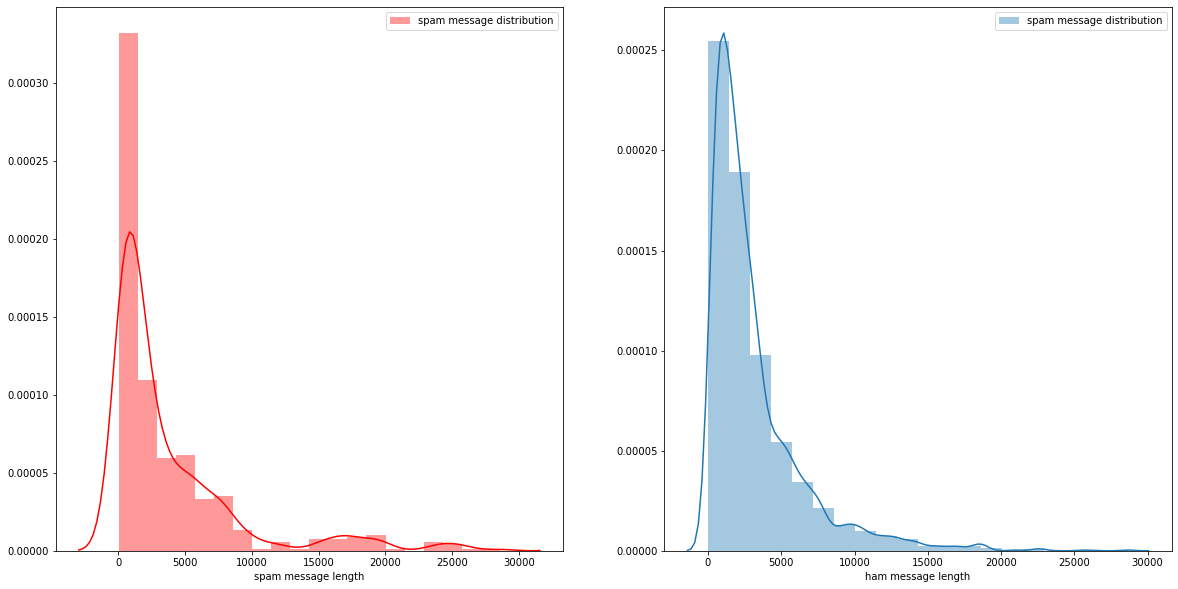

In [26]:
#Message distribution Before cleaning
f,ax=plt.subplots(1,2 ,figsize=(20,10))

sns.distplot(df[df['label']==1]['length'],bins=20,ax=ax[0],label="spam message distribution",color='red')
ax[0].set_xlabel('spam message length')
ax[0].legend()


sns.distplot(df[df['label']==0]['length'],bins=20,ax=ax[1],label="spam message distribution")
ax[1].set_xlabel('ham message length')
ax[1].legend()

plt.show()

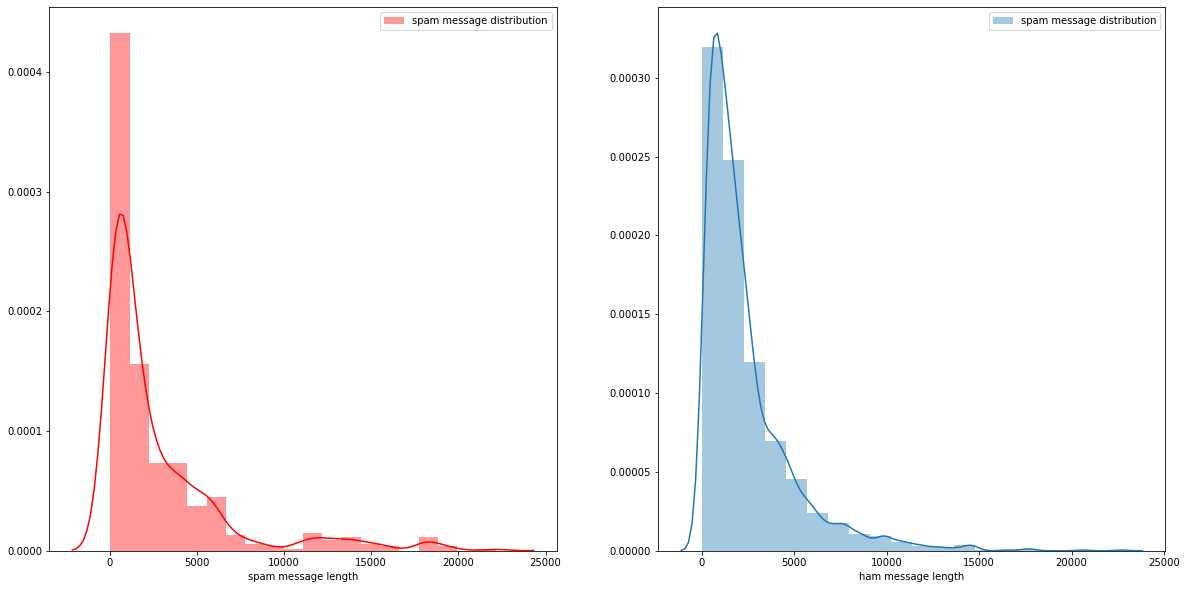

In [27]:
#Message distribution After cleaning
f,ax=plt.subplots(1,2 ,figsize=(20,10))

sns.distplot(df[df['label']==1]['clean_length'],bins=20,ax=ax[0],label="spam message distribution",color='red')
ax[0].set_xlabel('spam message length')
ax[0].legend()


sns.distplot(df[df['label']==0]['clean_length'],bins=20,ax=ax[1],label="spam message distribution")
ax[1].set_xlabel('ham message length')
ax[1].legend()

plt.show()

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , confusion_matrix ,roc_auc_score, classification_report,f1_score



In [29]:
tf_vec=TfidfVectorizer()
naive=MultinomialNB()
features=tf_vec.fit_transform(df['message'])
X=features
y=df['label']

In [30]:
#train-test split
X_train,x_test,y_train,y_test=train_test_split(X,y,random_state=42)
naive.fit(X_train,y_train)
y_pred=naive.predict(x_test)
print('Accuracy score:',accuracy_score(y_test,y_pred))

Accuracy score: 0.8121546961325967


In [31]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [32]:
print('classification report :',classification_report(y_test,y_pred))

classification report :               precision    recall  f1-score   support

           0       0.81      1.00      0.90       585
           1       1.00      0.02      0.04       139

    accuracy                           0.81       724
   macro avg       0.91      0.51      0.47       724
weighted avg       0.85      0.81      0.73       724



In [33]:
conf_matrix=confusion_matrix(y_test,y_pred)
conf_matrix

array([[585,   0],
       [136,   3]], dtype=int64)

In [34]:
f1_score(y_test,y_pred)

0.04225352112676056

In [35]:
print(roc_auc_score(y_test,y_pred))

0.5107913669064749
